# What is [argparse](https://docs.python.org/3/library/argparse.html)?

New in python version 3.2, this is the recommended **parser** for command-line options, arguments, and sub-commands. (It's also a standard library!)

Your program defines what arguments it requires, and **argparse** will:
- figure out how to parse those out of [`sys.argv`](https://docs.python.org/3/library/sys.html#sys.argv)
- automatically generate help & usage messages
- issue errors when users give invalid arguments

You can even check out [this tutorial](https://docs.python.org/3/howto/argparse.html#id1) but here I'll walk you through different concepts.

## [argpase.ArgumentParser](https://docs.python.org/3/library/argparse.html#argparse.ArgumentParser)

This particular module is built around an instance of the [**argparse.ArgumentParser**](https://docs.python.org/3/library/argparse.html#argparse.ArgumentParser), and by default these objects use `sys.argv[0]` to determine how to display the name of the program and help messages.

Below is the pseudocode for how to call/use this object::

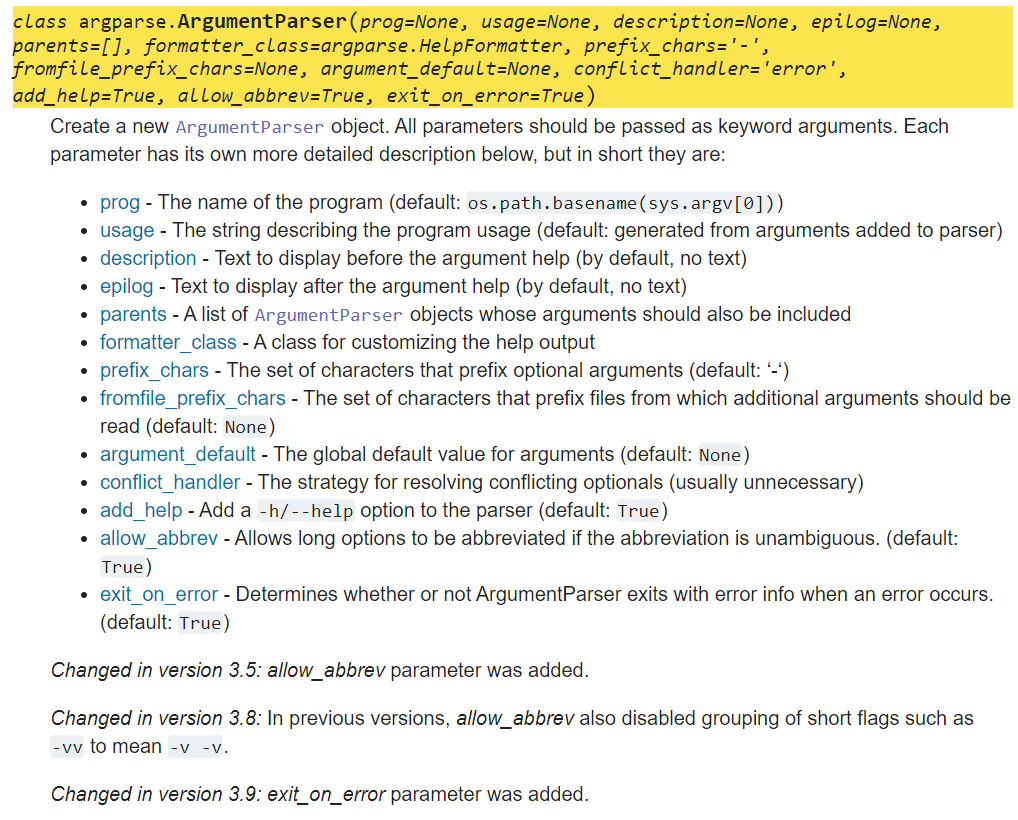

As you can see, there are many options here. I'll be covering just a few to get you started, but please check out the documentation for more!

In this training, we'll cover:
1. [prog](https://docs.python.org/3/library/argparse.html#prog)
2. [description](https://docs.python.org/3/library/argparse.html#description)
3. [epilogue](https://docs.python.org/3/library/argparse.html#epilog)
4. [add_help](https://docs.python.org/3/library/argparse.html#add-help)
5. [exit_on_error](https://docs.python.org/3/library/argparse.html#exit-on-error) (added in python version 3.9)

## How To Use Built-In Module

Once you import the module, you can begin using it. No installs required!

`import argparse`

In [1]:
import argparse

# Instantiation Arguments

While there are others, I will be covering a few you are most likely to utilize for your own code.

## prog

In the below example, we'll see how the different options work.

In [9]:
parser = argparse.ArgumentParser()
parser.print_help()

usage: ipykernel_launcher.py [-h]

options:
  -h, --help  show this help message and exit


In [10]:
parser = argparse.ArgumentParser(prog="Test Program Parser")
parser.print_help()

usage: Test Program Parser [-h]

options:
  -h, --help  show this help message and exit


You'll notice that without `prog` it takes the name of the file that is instantiating (creating) the parser. So setting this option allows you to provide better insight to your program when people are running it at command line.

You also have the ability to use the program name to utilize in help messages by using `%(prog)s` in the string.

## [description](https://docs.python.org/3/library/argparse.html#description)

This argument (done upon instantiation) gives a brief description of what the program does and how it works. In help messages, it is displayed between the command-line usage string and the help messages for various arguments.

By default, it is line wrapped - but you can change this with the [formatter_class](https://docs.python.org/3/library/argparse.html#formatter-class) argument.

In [13]:
parser = argparse.ArgumentParser(prog="Test Program Parser",
                                 description="some description here")
parser.print_help()

usage: Test Program Parser [-h]

some description here

options:
  -h, --help  show this help message and exit


## [epilogue](https://docs.python.org/3/library/argparse.html#epilog)

If this is included, text will show up at the bottom - after description of arguments.

By default, it is line wrapped - but you can change this with the [formatter_class](https://docs.python.org/3/library/argparse.html#formatter-class) argument.

In [14]:
parser = argparse.ArgumentParser(prog="Test Program Parser",
                                 description="some description here",
                                epilog="Created by Kassandra Keeton | www.prosperousheart.com")
parser.print_help()

usage: Test Program Parser [-h]

some description here

options:
  -h, --help  show this help message and exit

Created by Kassandra Keeton | www.prosperousheart.com


## [add_help](https://docs.python.org/3/library/argparse.html#add-help)

By default, this is true upon instantiation. This means that if `-h` or `--help` is supplied at command line, then the help will be printed for the script. If you wished to turn it off, you would run something like the following:

```python
parser = argparse.ArgumentParser(prog="Test Program Parser",
                                 description="some description here",
                                 epilog="Created by Kassandra Keeton | www.prosperousheart.com",
                                 add_help=False
                                )
```

In [34]:
parser = argparse.ArgumentParser(prog="Test Program Parser",
                                 description="some description here",
                                 epilog="Created by Kassandra Keeton | www.prosperousheart.com",
                                 add_help=False
                                )
parser.print_help()

usage: Test Program Parser

some description here

Created by Kassandra Keeton | www.prosperousheart.com


## exit_on_error


# Adding & Parsing Arguments For Parser

In order to utilize arguments provided when running a script from command line, you must tell the parser what they are - you can then call them as if they were class attributes.

## [parse_args()](https://docs.python.org/3/library/argparse.html#argparse.ArgumentParser.parse_args)

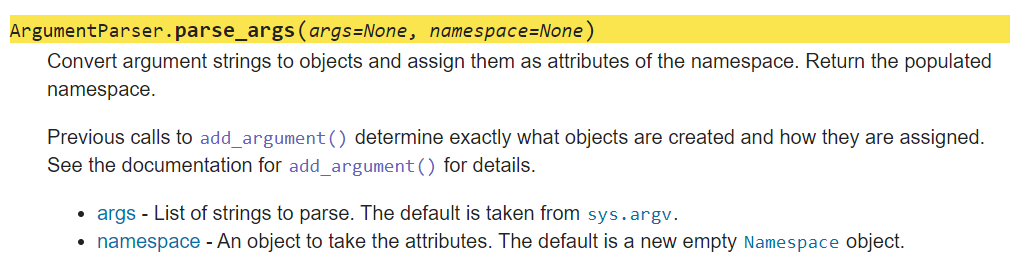

Whether you get the arguments & their data via the command line when running the python script or create the arguments programatically ... This is the function you call to parse the arguments.



## [add_argument()](https://docs.python.org/3/library/argparse.html#the-add-argument-method)

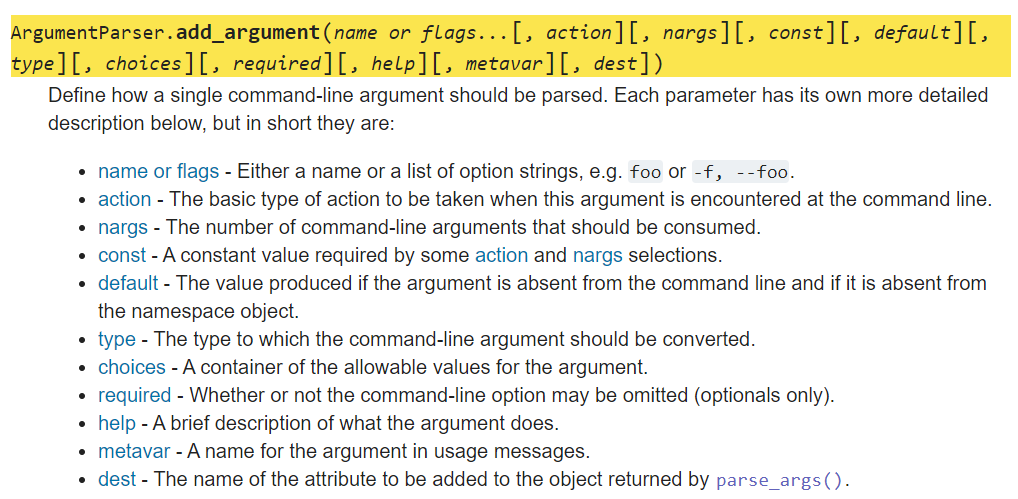

Once again, there are several pieces with which you can do some cool things. I'll cover a few:

1. name or flags
2. required
3. help
4. type
5. choices

### [name or flags](https://docs.python.org/3/library/argparse.html#name-or-flags)

Even if nothing else is provided, this is required when adding an argument to the parser.

By default, the parser assumes that anything which starts with `-` or `--` is optional, whereas other texts (without this pre-pended dash) is positional. (Or required.)

If you want to force an argument to happen and also have the `-` or `--` before it, you would use the next item ...

### [required](https://docs.python.org/3/library/argparse.html#required)

By default, this is `False`. If you provide this argument as `True` and the command is not provided, an error at the command line will appear.

```python
# Try this to see which ones are required!
parser = argparse.ArgumentParser(prog="Test Program Parser",
                                 description="some description here",
                                 epilog="Created by Kassandra Keeton | www.prosperousheart.com"
                                )
parser.add_argument('-fn')               # optional
parser.add_argument('-u', required=True) # required
parser.add_argument('pw')                # required
parser.print_help()
```

In [35]:
parser = argparse.ArgumentParser(prog="Test Program Parser",
                                 description="some description here",
                                 epilog="Created by Kassandra Keeton | www.prosperousheart.com"
                                )
parser.add_argument('-fn')  # optional
parser.add_argument('-u', required=True) # required
parser.add_argument('pw')  # required
parser.print_help()

usage: Test Program Parser [-h] [-fn FN] -u U pw

some description here

positional arguments:
  pw

options:
  -h, --help  show this help message and exit
  -fn FN
  -u U

Created by Kassandra Keeton | www.prosperousheart.com


You can see in the printed help section which ones are optional (surrounded by brackets: `[]`) and which are required.

_What might happen if you switched the **add_argument()** functions around?_

**NOTE:** required options are typically "bad form" since users expect options to be optional.

```python
# Try each line to see how the error looks!
parser.parse_args(['-fn=YourFirstNameHere', '-u=username', 'pw=insecurepassword'])  # nothing missing
parser.parse_args(['-u=username', 'pw=insecurepassword'])                           # -fn (first name) not given
parser.parse_args(['-fn=YourFirstNameHere', 'pw=insecurepassword'])                 # U (-u) not given
parser.parse_args(['-fn=YourFirstNameHere', '-u=username'])                         # pw (PW) not given

```

There are other ways to provide the arguments programatically, but this seems the easiest when you have multiple required options.

### [help](https://docs.python.org/3/library/argparse.html#help)

TBD

### [type](https://docs.python.org/3/library/argparse.html#type)

By default, the parser reads in the arguments as simple strings. But if you make the argument be of a particular type, you create a built-in check to ensure that the input has type checking performed. If it fails, you may see an exception of the follow ingtypes raised:
- ArguementTypeError
- [TypeError](https://docs.python.org/3/library/exceptions.html#TypeError)
- [ValueError](https://docs.python.org/3/library/exceptions.html#ValueError)

```python
# Try this!
parser.add_argument('-age', type=int)
parser.print_help()

# And then try each of these!
parser.parse_args(['-fn=YourFirstNameHere', '-u=username', 'pw=insecurepassword', '-age=32'])
parser.parse_args(['-fn=YourFirstNameHere', '-u=username', 'pw=insecurepassword', 'age=32'])
```

_Did you notice anything different between the last 2 lines?_

### [choices](https://docs.python.org/3/library/argparse.html#choices)

TBD

# Using Arguments To Create A New Class Object

TBD via [NameSpace](https://docs.python.org/3/library/argparse.html#argparse.Namespace) training

You may have noticed The `NameSpace()` when running the below script:

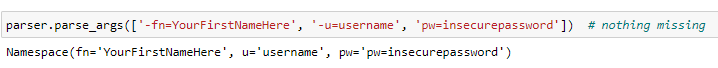

Here's where we will discuss this...